In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [2]:
sheet_1 = pd.read_excel("../Customer Churn Analysis and prediction Model/Bank_Churn_Messy.xlsx", sheet_name='Customer_Info')

In [3]:
sheet_1.head()

CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
0    15634602  Hargrave          619       FRA  Female  42.0       2   
1    15647311      Hill          608     Spain  Female  41.0       1   
2    15619304      Onio          502    French  Female  42.0       8   
3    15701354      Boni          699       FRA  Female  39.0       1   
4    15737888  Mitchell          850     Spain  Female  43.0       2   

  EstimatedSalary  
0      €101348.88  
1      €112542.58  
2      €113931.57  
3       €93826.63  
4        €79084.1

In [4]:
sheet_2 = pd.read_excel("../Customer Churn Analysis and prediction Model/Bank_Churn_Messy.xlsx", sheet_name='Account_Info')

In [5]:
sheet_2.head()

CustomerId    Balance  NumOfProducts HasCrCard  Tenure IsActiveMember  \
0    15634602       €0.0              1       Yes       2            Yes   
1    15634602       €0.0              1       Yes       2            Yes   
2    15647311  €83807.86              1       Yes       1            Yes   
3    15619304  €159660.8              3        No       8             No   
4    15701354       €0.0              2        No       1             No   

   Exited  
0       1  
1       1  
2       0  
3       1  
4       0

## Merging Datasets

In [6]:
Merged = pd.merge(sheet_1,sheet_2,on="CustomerId")

In [7]:
Merged.head()

CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure_x  \
0    15634602  Hargrave          619       FRA  Female  42.0         2   
1    15634602  Hargrave          619       FRA  Female  42.0         2   
2    15647311      Hill          608     Spain  Female  41.0         1   
3    15619304      Onio          502    French  Female  42.0         8   
4    15701354      Boni          699       FRA  Female  39.0         1   

  EstimatedSalary    Balance  NumOfProducts HasCrCard  Tenure_y  \
0      €101348.88       €0.0              1       Yes         2   
1      €101348.88       €0.0              1       Yes         2   
2      €112542.58  €83807.86              1       Yes         1   
3      €113931.57  €159660.8              3        No         8   
4       €93826.63       €0.0              2        No         1   

  IsActiveMember  Exited  
0            Yes       1  
1            Yes       1  
2            Yes       0  
3             No       1  
4             No       0

In [8]:
Merged.drop('Tenure_y', axis=1, inplace=True)

In [9]:
Merged.head()

CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure_x  \
0    15634602  Hargrave          619       FRA  Female  42.0         2   
1    15634602  Hargrave          619       FRA  Female  42.0         2   
2    15647311      Hill          608     Spain  Female  41.0         1   
3    15619304      Onio          502    French  Female  42.0         8   
4    15701354      Boni          699       FRA  Female  39.0         1   

  EstimatedSalary    Balance  NumOfProducts HasCrCard IsActiveMember  Exited  
0      €101348.88       €0.0              1       Yes            Yes       1  
1      €101348.88       €0.0              1       Yes            Yes       1  
2      €112542.58  €83807.86              1       Yes            Yes       0  
3      €113931.57  €159660.8              3        No             No       1  
4       €93826.63       €0.0              2        No             No       0

In [10]:
Merged_copy = Merged.copy()


# Data Cleaning

In [11]:
Merged_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  IsActiveMember   10004 non-null  object 
 12  Exited           10004 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1016.2+ KB


## Checking and Removing Duplicates

In [12]:
Merged_copy.duplicated().sum()

4

In [13]:
Merged_copy = Merged_copy.drop_duplicates()

In [14]:
Merged_copy.duplicated().sum()

0

## Dropping Irrelavant Columns like cust_id,Surname

In [15]:
Merged_copy.drop(["CustomerId","Surname"],axis=1,inplace=True)

In [16]:
Merged_copy.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure_x',
       'EstimatedSalary', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [17]:
Merged_copy.head()

CreditScore Geography  Gender   Age  Tenure_x EstimatedSalary     Balance  \
0          619       FRA  Female  42.0         2      €101348.88        €0.0   
2          608     Spain  Female  41.0         1      €112542.58   €83807.86   
3          502    French  Female  42.0         8      €113931.57   €159660.8   
4          699       FRA  Female  39.0         1       €93826.63        €0.0   
5          850     Spain  Female  43.0         2        €79084.1  €125510.82   

   NumOfProducts HasCrCard IsActiveMember  Exited  
0              1       Yes            Yes       1  
2              1       Yes            Yes       0  
3              3        No             No       1  
4              2        No             No       0  
5              1       Yes            Yes       0

## Formatting currency columns

In [18]:
def clean_currency(column):
    return column.str.replace('€', '', regex=False).str.replace('\t', '', regex=False).str.strip().astype(float)

Merged_copy['EstimatedSalary'] = clean_currency(Merged_copy['EstimatedSalary'])
Merged_copy['Balance'] = clean_currency(Merged_copy['Balance'])

In [19]:
Merged_copy.head()

CreditScore Geography  Gender   Age  Tenure_x  EstimatedSalary    Balance  \
0          619       FRA  Female  42.0         2        101348.88       0.00   
2          608     Spain  Female  41.0         1        112542.58   83807.86   
3          502    French  Female  42.0         8        113931.57  159660.80   
4          699       FRA  Female  39.0         1         93826.63       0.00   
5          850     Spain  Female  43.0         2         79084.10  125510.82   

   NumOfProducts HasCrCard IsActiveMember  Exited  
0              1       Yes            Yes       1  
2              1       Yes            Yes       0  
3              3        No             No       1  
4              2        No             No       0  
5              1       Yes            Yes       0

In [75]:
Merged_copy["Geography"].value_counts()

Geography
Germany    2509
Spain      2477
France     1741
French     1655
FRA        1618
Name: count, dtype: int64

In [79]:
Merged_copy.loc[(Merged_copy["Geography"] == "FRA") | (Merged_copy["Geography"] == "French"), "Geography"] = "France"

In [80]:
Merged_copy["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [81]:
Merged_copy.describe()

CreditScore           Age      Tenure_x  EstimatedSalary  \
count  10000.000000  10000.000000  10000.000000     10000.000000   
mean     650.528800     38.921500      5.012800    100092.252506   
std       96.653299     10.487552      2.892174     57510.146401   
min      350.000000     18.000000      0.000000        11.580000   
25%      584.000000     32.000000      3.000000     51002.110000   
50%      652.000000     37.000000      5.000000    100196.062500   
75%      718.000000     44.000000      7.000000    149388.247500   
max      850.000000     92.000000     10.000000    199992.480000   

             Balance  NumOfProducts        Exited   Zero_Balnce  
count   10000.000000   10000.000000  10000.000000  10000.000000  
mean    76485.889288       1.530200      0.203700      0.361700  
std     62397.405202       0.581654      0.402769      0.480517  
min         0.000000       1.000000      0.000000      0.000000  
25%         0.000000       1.000000      0.000000      0.000000  
50%     97198.540000       1.000000      0.000000      0.000000  
75%    127644.240000       2.000000      0.000000      1.000000  
max    250898.090000       4.000000      1.000000      1.000000

In [21]:
Merged_copy["EstimatedSalary"].value_counts().head()

EstimatedSalary
-999999.00    3
 24924.92     2
 101348.88    1
 10288.24     1
 72500.68     1
Name: count, dtype: int64

In [22]:
Merged_copy["Tenure_x"].value_counts()

Tenure_x
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [23]:
Merged_copy.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                3
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

## Replacing Null and default values with Median


In [24]:
def impute_with_median(df, columns, default_value=-999999.0):
    for col in columns:
        median_value = df[col].replace(default_value, np.nan).median() 
        df[col] = df[col].replace(default_value, np.nan).fillna(median_value)  
    return df

In [25]:
Merged_copy['Age'] = Merged_copy['Age'].fillna(Merged_copy['Age'].median())
Merged_copy['EstimatedSalary'] = Merged_copy['EstimatedSalary'].replace(-999999.0, np.nan).fillna(Merged_copy['EstimatedSalary'].median()) 

In [26]:
Merged_copy.describe()

CreditScore           Age      Tenure_x  EstimatedSalary  \
count  10000.000000  10000.000000  10000.000000     10000.000000   
mean     650.528800     38.921500      5.012800    100092.252506   
std       96.653299     10.487552      2.892174     57510.146401   
min      350.000000     18.000000      0.000000        11.580000   
25%      584.000000     32.000000      3.000000     51002.110000   
50%      652.000000     37.000000      5.000000    100196.062500   
75%      718.000000     44.000000      7.000000    149388.247500   
max      850.000000     92.000000     10.000000    199992.480000   

             Balance  NumOfProducts        Exited  
count   10000.000000   10000.000000  10000.000000  
mean    76485.889288       1.530200      0.203700  
std     62397.405202       0.581654      0.402769  
min         0.000000       1.000000      0.000000  
25%         0.000000       1.000000      0.000000  
50%     97198.540000       1.000000      0.000000  
75%    127644.240000       2.000000      0.000000  
max    250898.090000       4.000000      1.000000

In [27]:
Merged_copy.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

# Permorfing EDA and making strategy for Preprocessing

## Checking Data Imbalance


Exited
0    7963
1    2037
Name: count, dtype: int64

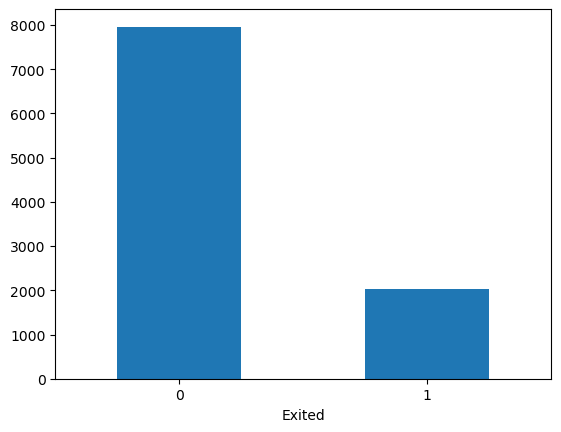

In [28]:
Merged_copy['Exited'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
Merged_copy['Exited'].value_counts()
# Observation 1 : Data is quiet Imbalanced

## Categorical Column Analysis

## Distribution

In [82]:
def plot_categorical_pie_charts(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(cat_cols):
        counts = df[col].value_counts()
        wedges, texts, autotexts = axes[i].pie(
            counts, labels=counts.index, autopct='%1.1f%%',
            startangle=90, colors=plt.cm.Paired.colors
        )
        axes[i].set_title(f'Pie Chart of {col}')
        axes[i].axis('equal')
        axes[i].legend(counts.index, title=col, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
        for t in autotexts: t.set(fontsize=10, color='black')
        for t in texts: t.set_fontsize(9)
    
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.show()

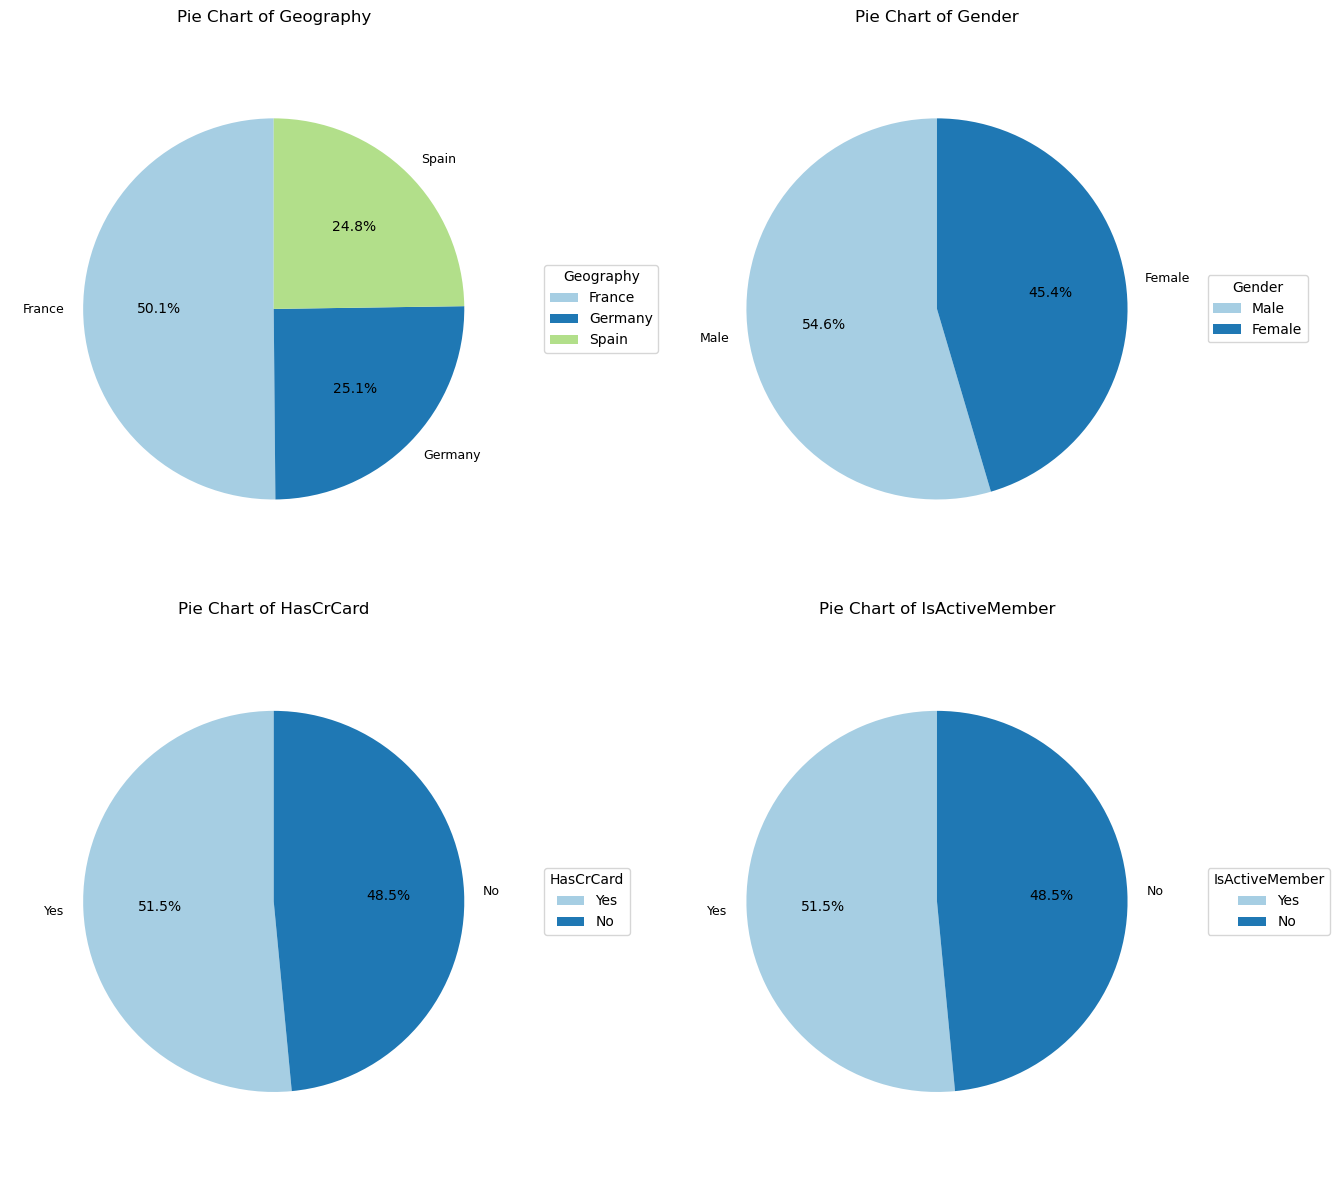

In [83]:
plot_categorical_pie_charts(Merged_copy)

In [31]:
# Observation:
# -- there are more male customers as compared to female customers
# -- distribution of other categorical variables are quiet uniform
# The percentage of customers from France constitute 50% of the customers


## Category, Subcategory and its relation with the target variable

In [84]:
import matplotlib.patches as mpatches

def plot_multiple_categorical_vs_binary_target(df, target_column):
    df = df.copy()
    if 'Exited_Label' not in df.columns:
        df['Exited_Label'] = df[target_column].map({0: 'Not Exited', 1: 'Exited'})
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    palette = {'Not Exited': 'skyblue', 'Exited': 'lightcoral'}
    
    for col in cat_cols:
        data = df.groupby([col, 'Exited_Label']).size().reset_index(name='count')
        plt.figure(figsize=(8, 6))
        ax = sns.barplot(x=col, y='count', hue='Exited_Label', data=data, palette=palette)
        plt.title(f'{col} vs {target_column}')
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2, p.get_height()), 
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
        handles = [mpatches.Patch(color='lightcoral', label='Exited'),
                   mpatches.Patch(color='skyblue', label='Not Exited')]
        plt.legend(handles=handles, title=target_column, loc='upper left')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


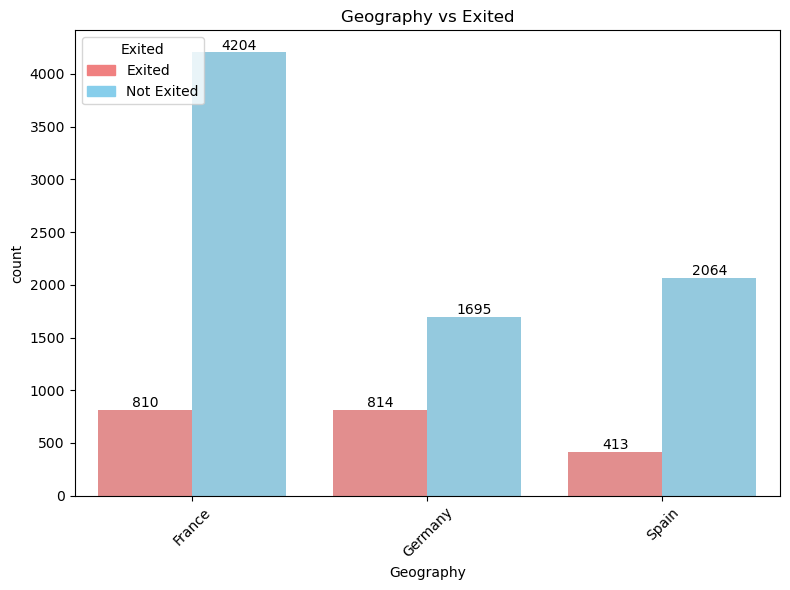

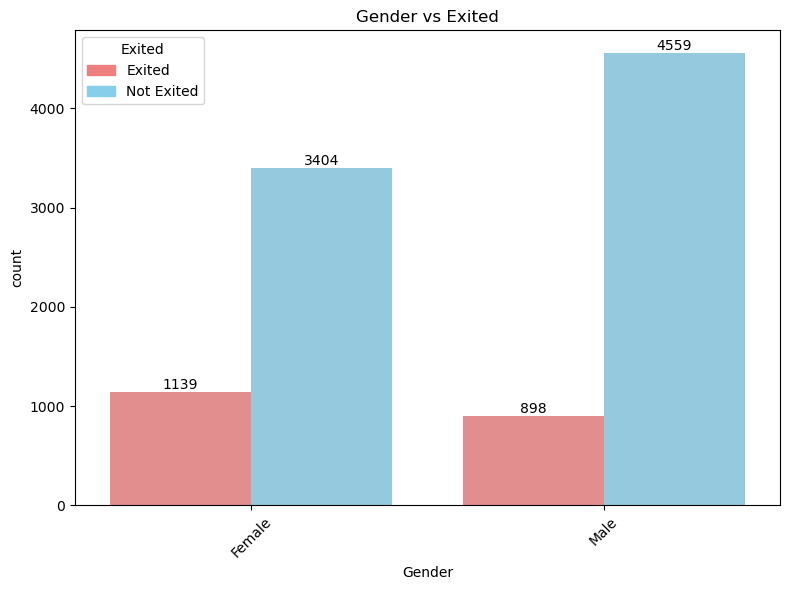

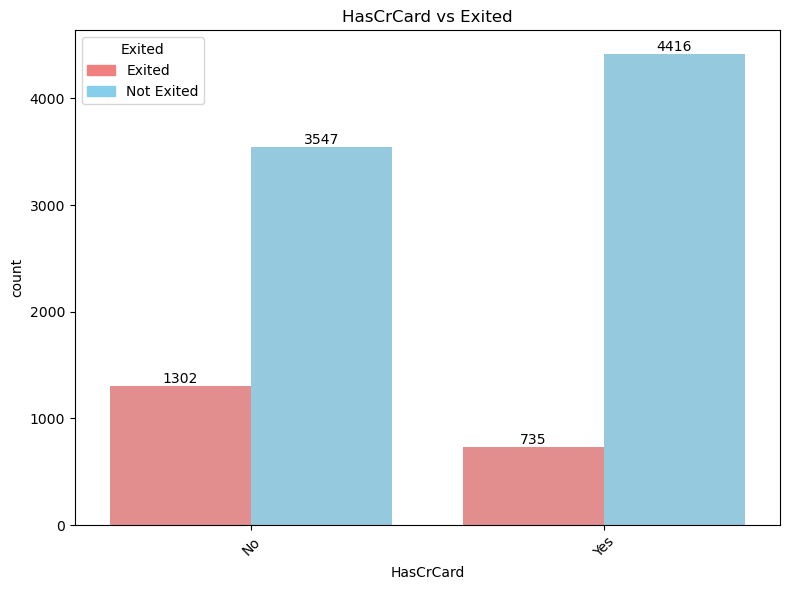

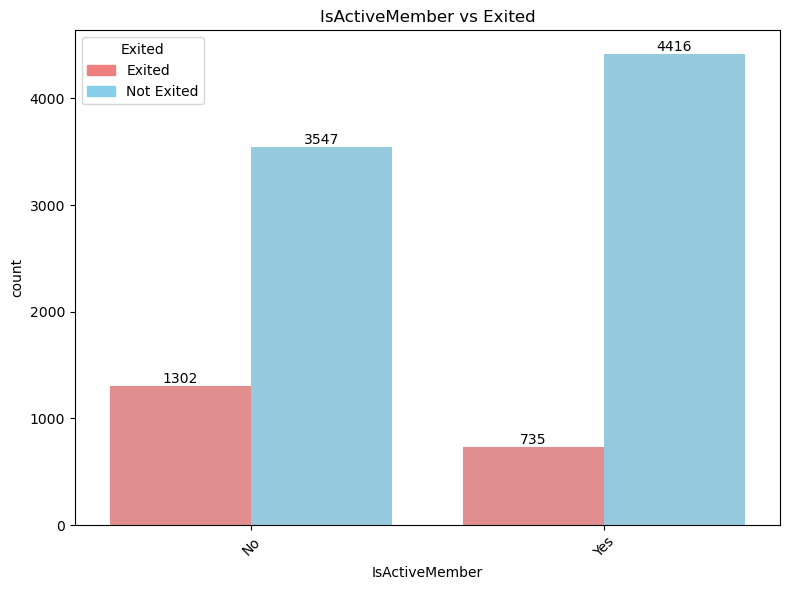

ValueError: cannot insert Exited_Label, already exists

In [85]:
plot_multiple_categorical_vs_binary_target(Merged_copy, 'Exited')

In [ ]:
# Observations :
# -- Germany has the most number of churners followed by spain
# -- Female Churners are more as compared to male
# -- Those not having credit cards tend to churn more
# -- those who are not active members tend to churn more


## Statistical Association Test using Chi-Square.

In [86]:
import scipy.stats as stats
def chi_square_test(df, target_variable):
   
    categorical_columns = df.select_dtypes(include=['object']).columns
    chi2_results = {}

    for col in categorical_columns:
        contingency_table = pd.crosstab(df[col], df[target_variable])
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        chi2_results[col] = {'Chi2': chi2, 'p-value': p}

    return pd.DataFrame.from_dict(chi2_results, orient='index')


In [87]:
chi_square_results = chi_square_test(Merged_copy, 'Exited')
print(chi_square_results)

                      Chi2       p-value
Geography       301.255337  3.830318e-66
Gender          112.918571  2.248210e-26
HasCrCard       242.985342  8.785858e-55
IsActiveMember  242.985342  8.785858e-55


'''observation -  Chi-Square test results suggest strong associations between categorical features and the target variable (Exited), given the 
very low p-values (all < 0.05). So we will include all the categorical columns in our data.'''

# Numerical column Analysis

## Column Distribution

In [36]:
def plot_histograms_with_kde(df):
    cols = df.select_dtypes(include=['float64', 'int64']).columns
    n = len(cols)
    r = (n // 3) + 1
    fig, axes = plt.subplots(r, 3, figsize=(12, r * 4))
    axes = axes.flatten()
    for i, col in enumerate(cols):
        sns.histplot(df[col], kde=True, bins=20, color='darkblue', edgecolor='black', ax=axes[i])
        axes[i].set_title(f'Histogram and KDE of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    for i in range(n, len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

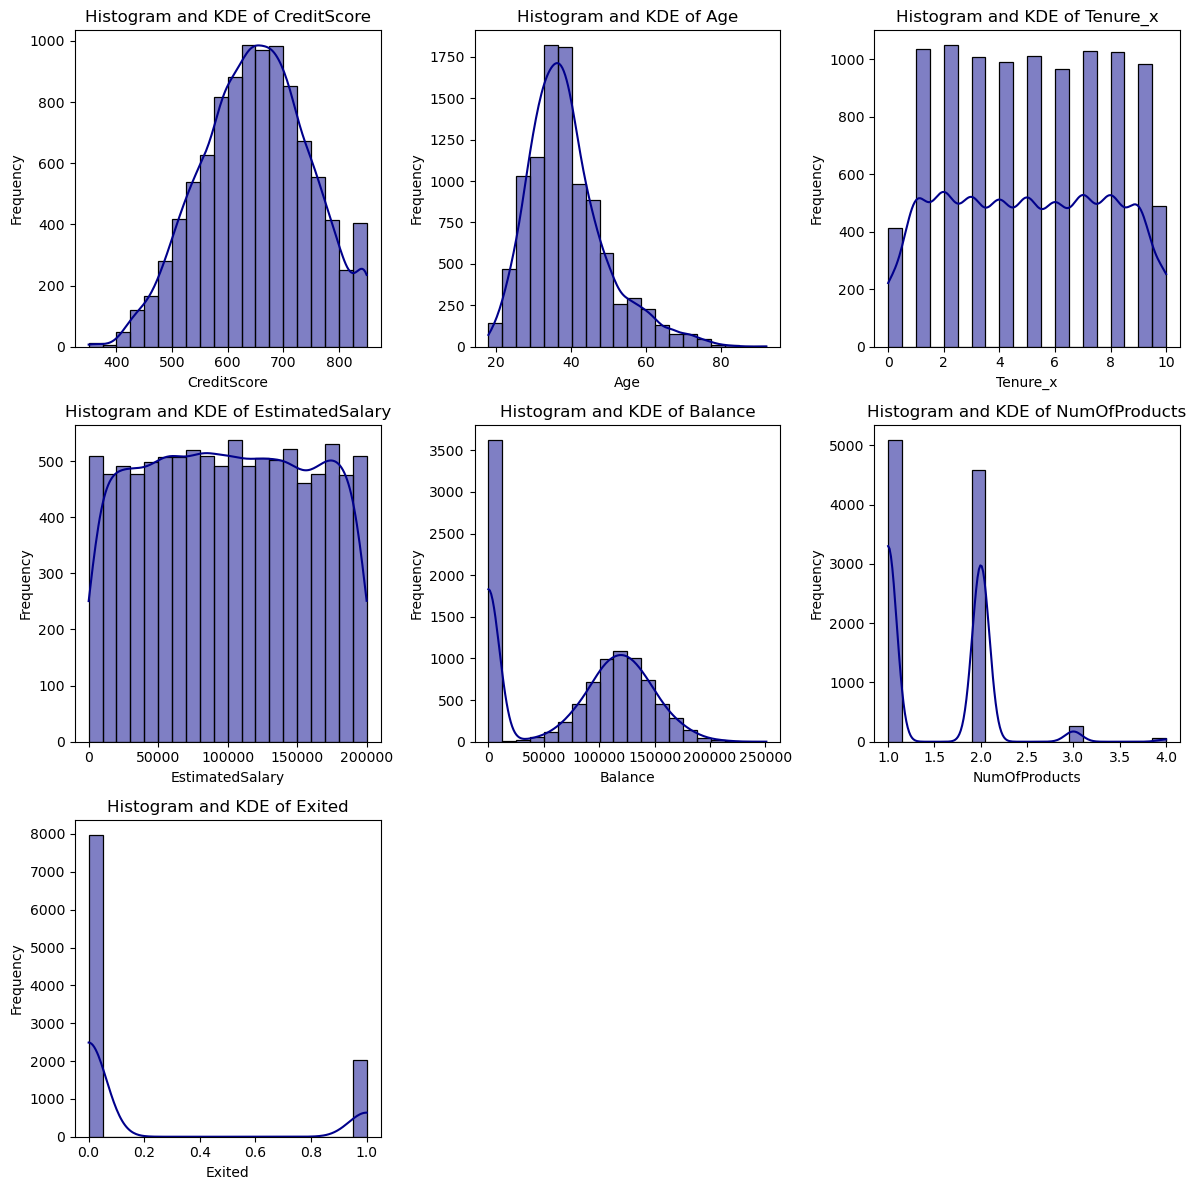

In [37]:
plot_histograms_with_kde(Merged_copy)

In [38]:
# Observations:
# -- credit score data is slightly left skewed
# -- Age is right skewed
# -- Tenure and No. of products are discrete numerical columns
# --Estimated Salary has a flat curve
# --Balance is mostly noraml except skewed for 1 data point.

## Checking relationship between discrete variables and target variable

In [39]:
def plot_stacked_bars(df, target, cols):
    for col in cols:
        pd.crosstab(df[col], df[target], normalize='index').plot(kind='bar', stacked=True)
        plt.title(f'{col} vs {target}')
        plt.ylabel('Proportion')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

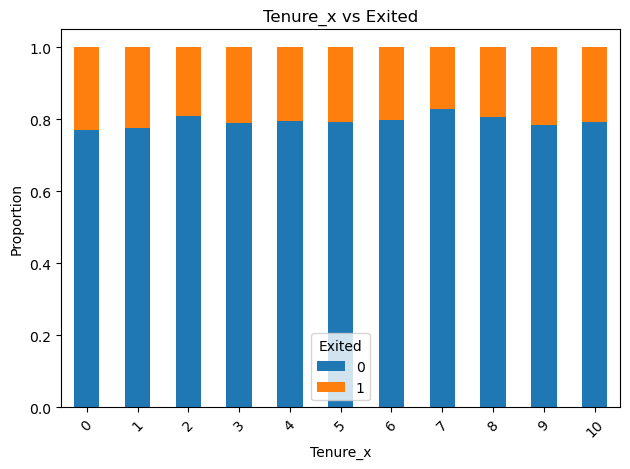

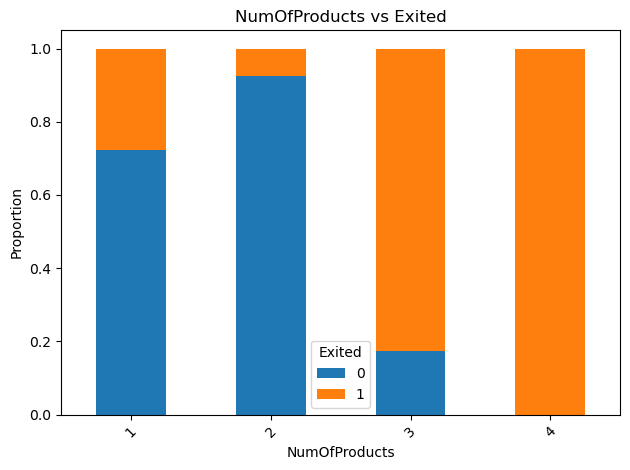

In [40]:
plot_stacked_bars(Merged_copy, target ='Exited', cols=['Tenure_x', 'NumOfProducts'])

In [41]:
# # Observations :
# -- there is no indicative pattern between tenure and Exited
# -- Customer having 1 or 2 products tend to churn the least
# -- Customer with 3 or 4 have churned more
# -- customer with 4 products have all churned

In [42]:
Merged_copy['Tenure_x'] = Merged_copy['Tenure_x'].astype(int)

## Checking relationship of Numerical Varibles with each other and the target variable

In [43]:
def plot_pairplot_with_target(data, target_variable):
    if target_variable not in data.columns:
        print(f"Error: The target variable '{target_variable}' is not in the dataframe.")
        return
    sns.pairplot(data, hue=target_variable, palette='coolwarm', diag_kind='kde', plot_kws={'s': 100, 'edgecolor': 'black'})
    plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

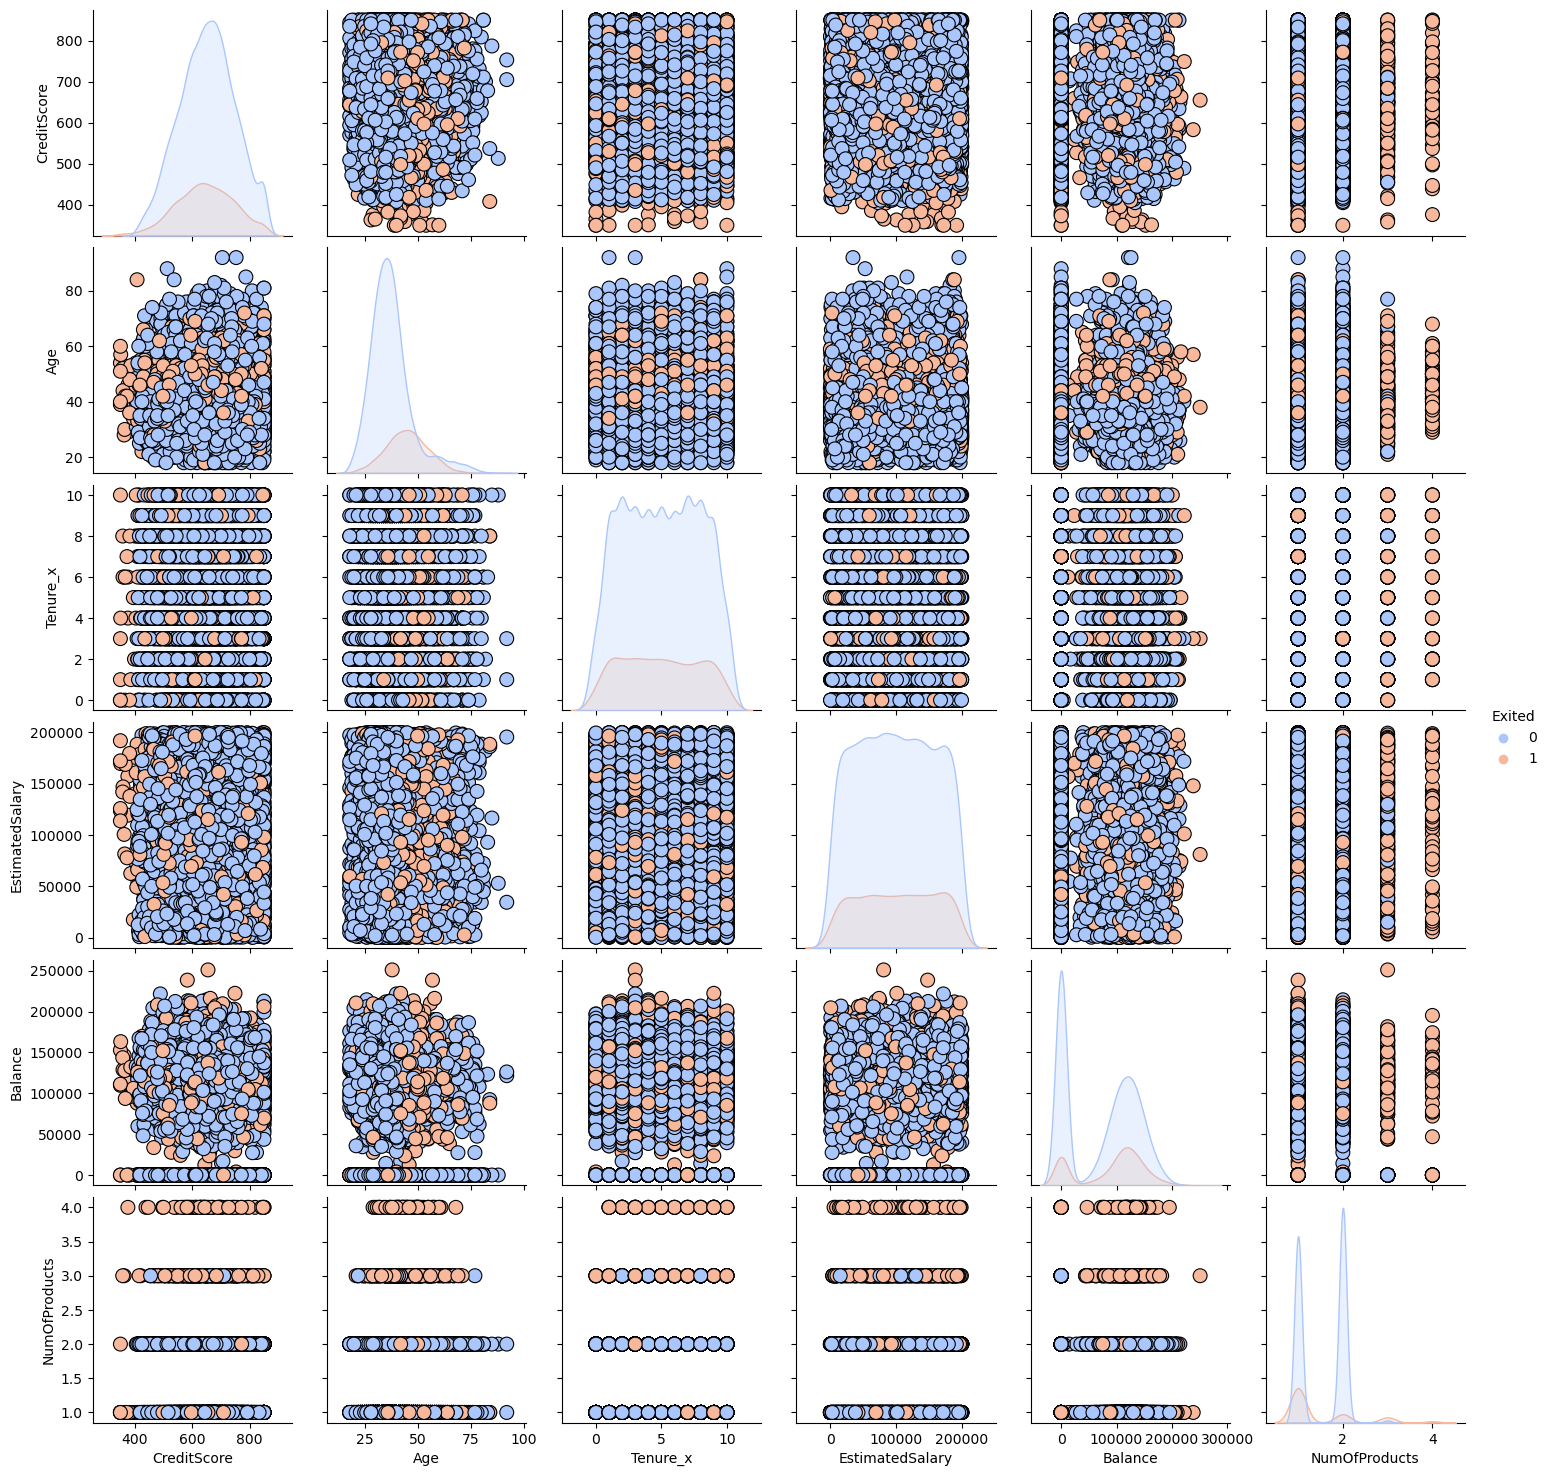

In [44]:
plot_pairplot_with_target(Merged_copy, 'Exited')

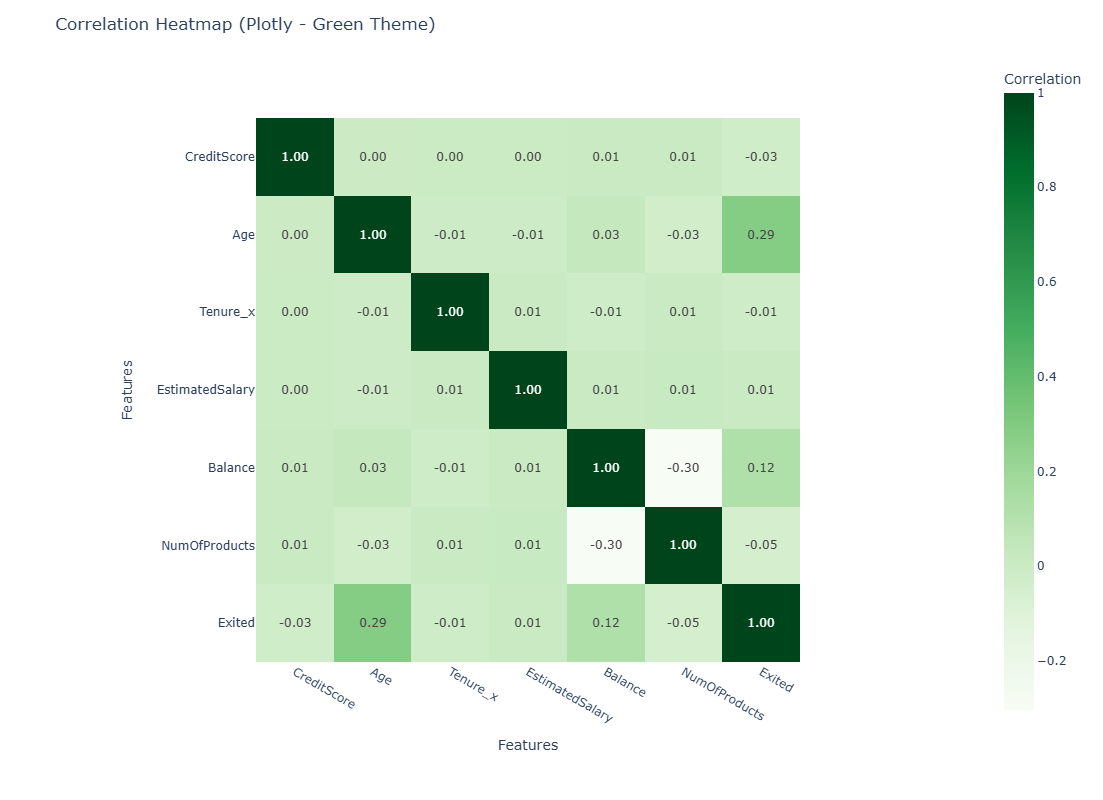

In [45]:
import plotly.express as px, pandas as pd

corr = Merged_copy.select_dtypes(include=['number']).corr()
fig = px.imshow(corr.values, labels=dict(x="Variable", y="Variable", color="Correlation"),
                x=corr.columns, y=corr.index, text_auto=".2f", color_continuous_scale="Greens")
fig.update_layout(title="Correlation Heatmap (Plotly - Green Theme)", xaxis_title="Features", yaxis_title="Features", width=800, height=800)
fig.show()

In [46]:
# # Observation :
# # -- As shown by the scatter plots and the heatmap there is no linear relationship between the numerical variables as points are randomly scattered and 
# the pearson r coefficient values is low to moderate


## Statistical Significance Using T-test

In [47]:
numerical_columns = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'Tenure_x']
target_variable = 'Exited'

for col in numerical_columns:
    g1 = Merged_copy[Merged_copy[target_variable] == 0][col]
    g2 = Merged_copy[Merged_copy[target_variable] == 1][col]
    t, p = stats.ttest_ind(g1, g2)
    print(f"Variable: {col}\nT-statistic: {t}\nP-value: {p}")
    print(f"The difference in means for {col} is {'statistically significant' if p < 0.05 else 'not statistically significant'}.\n")

Variable: CreditScore
T-statistic: 2.7100778888729833
P-value: 0.006738213892192373
The difference in means for CreditScore is statistically significant.

Variable: Age
T-statistic: -29.769245989831617
P-value: 1.1601008038066586e-186
The difference in means for Age is statistically significant.

Variable: EstimatedSalary
T-statistic: -1.2078906162879295
P-value: 0.22711791036853468
The difference in means for EstimatedSalary is not statistically significant.

Variable: Balance
T-statistic: -11.936240300013841
P-value: 1.2755633191525477e-32
The difference in means for Balance is statistically significant.

Variable: NumOfProducts
T-statistic: 4.786984698423093
P-value: 1.717333004804293e-06
The difference in means for NumOfProducts is statistically significant.

Variable: Tenure_x
T-statistic: 1.4000584366735584
P-value: 0.16152684949473256
The difference in means for Tenure_x is not statistically significant.



In [48]:
# # Observation:
# --- As shown by the p values of t-test we can say that Credit Score,Age,Balance,NumOfProducts have significant relationship with the target variable
# -- where as Estimated Salary and  Tenure_x does not have much significance.

## Boxplots to check for distribution and outliers


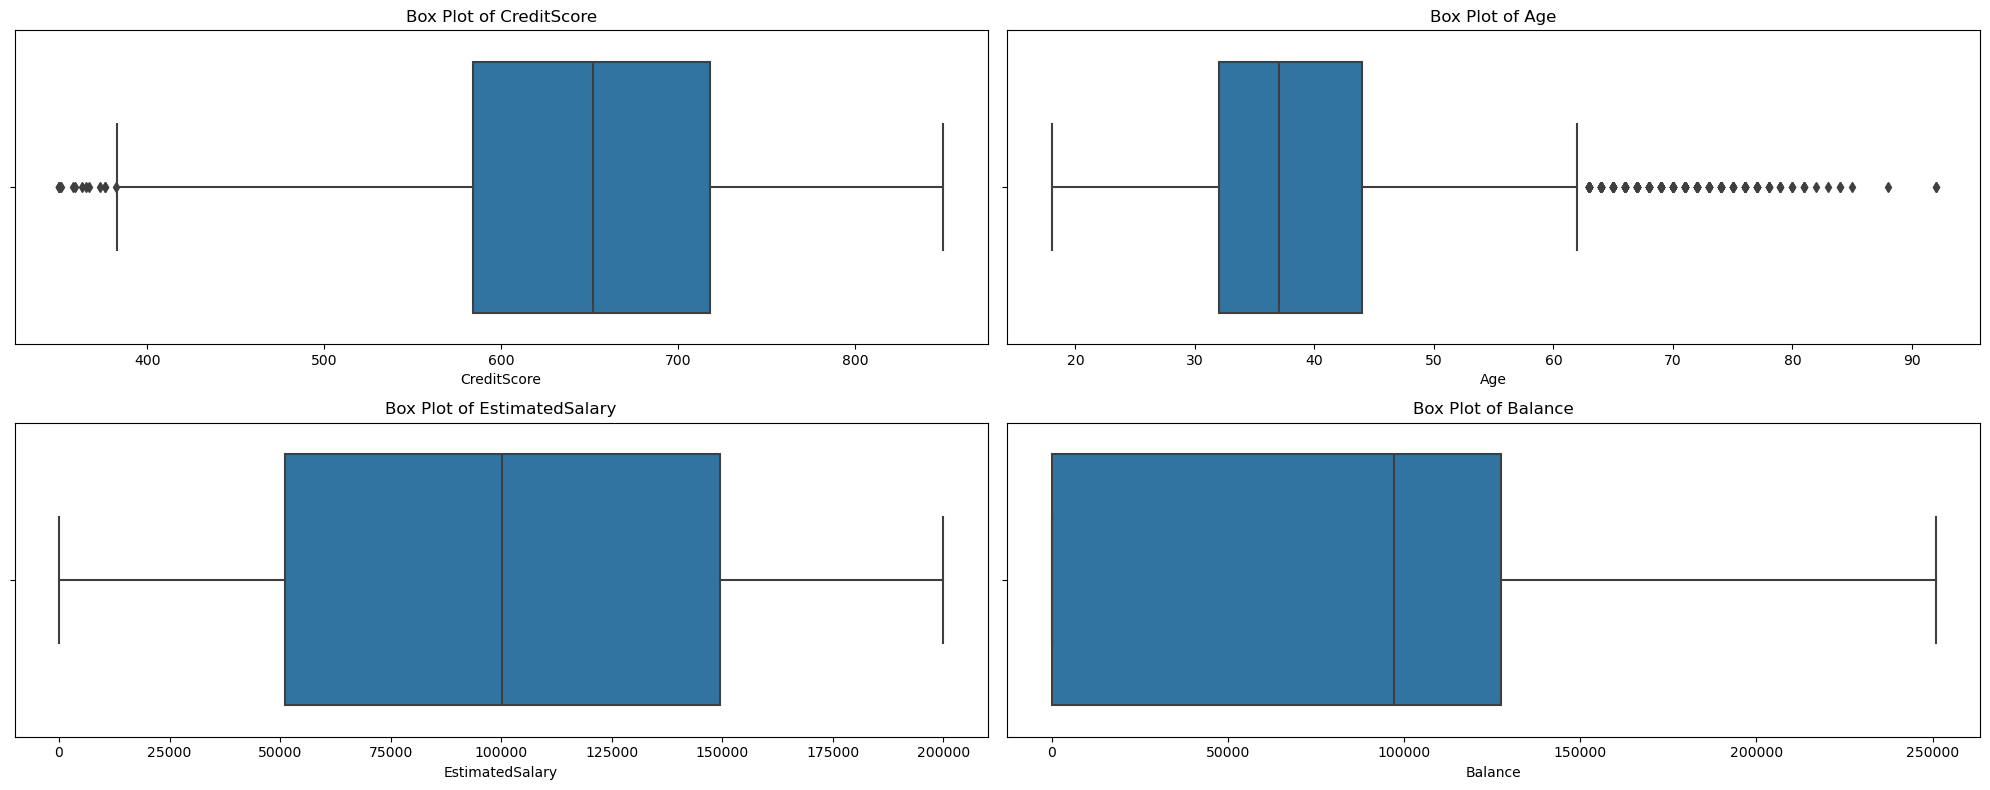

In [49]:
numerical_columns = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance']
fig, axes = plt.subplots(2, 2, figsize=(20, 8))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=Merged_copy, x=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [50]:
# # Observations:-
# -- We can see some outliers in the credit score and Age columns
# --Estimatedsal column look normal
# --Balance column is hightly right skewed

## Multivariable box plots

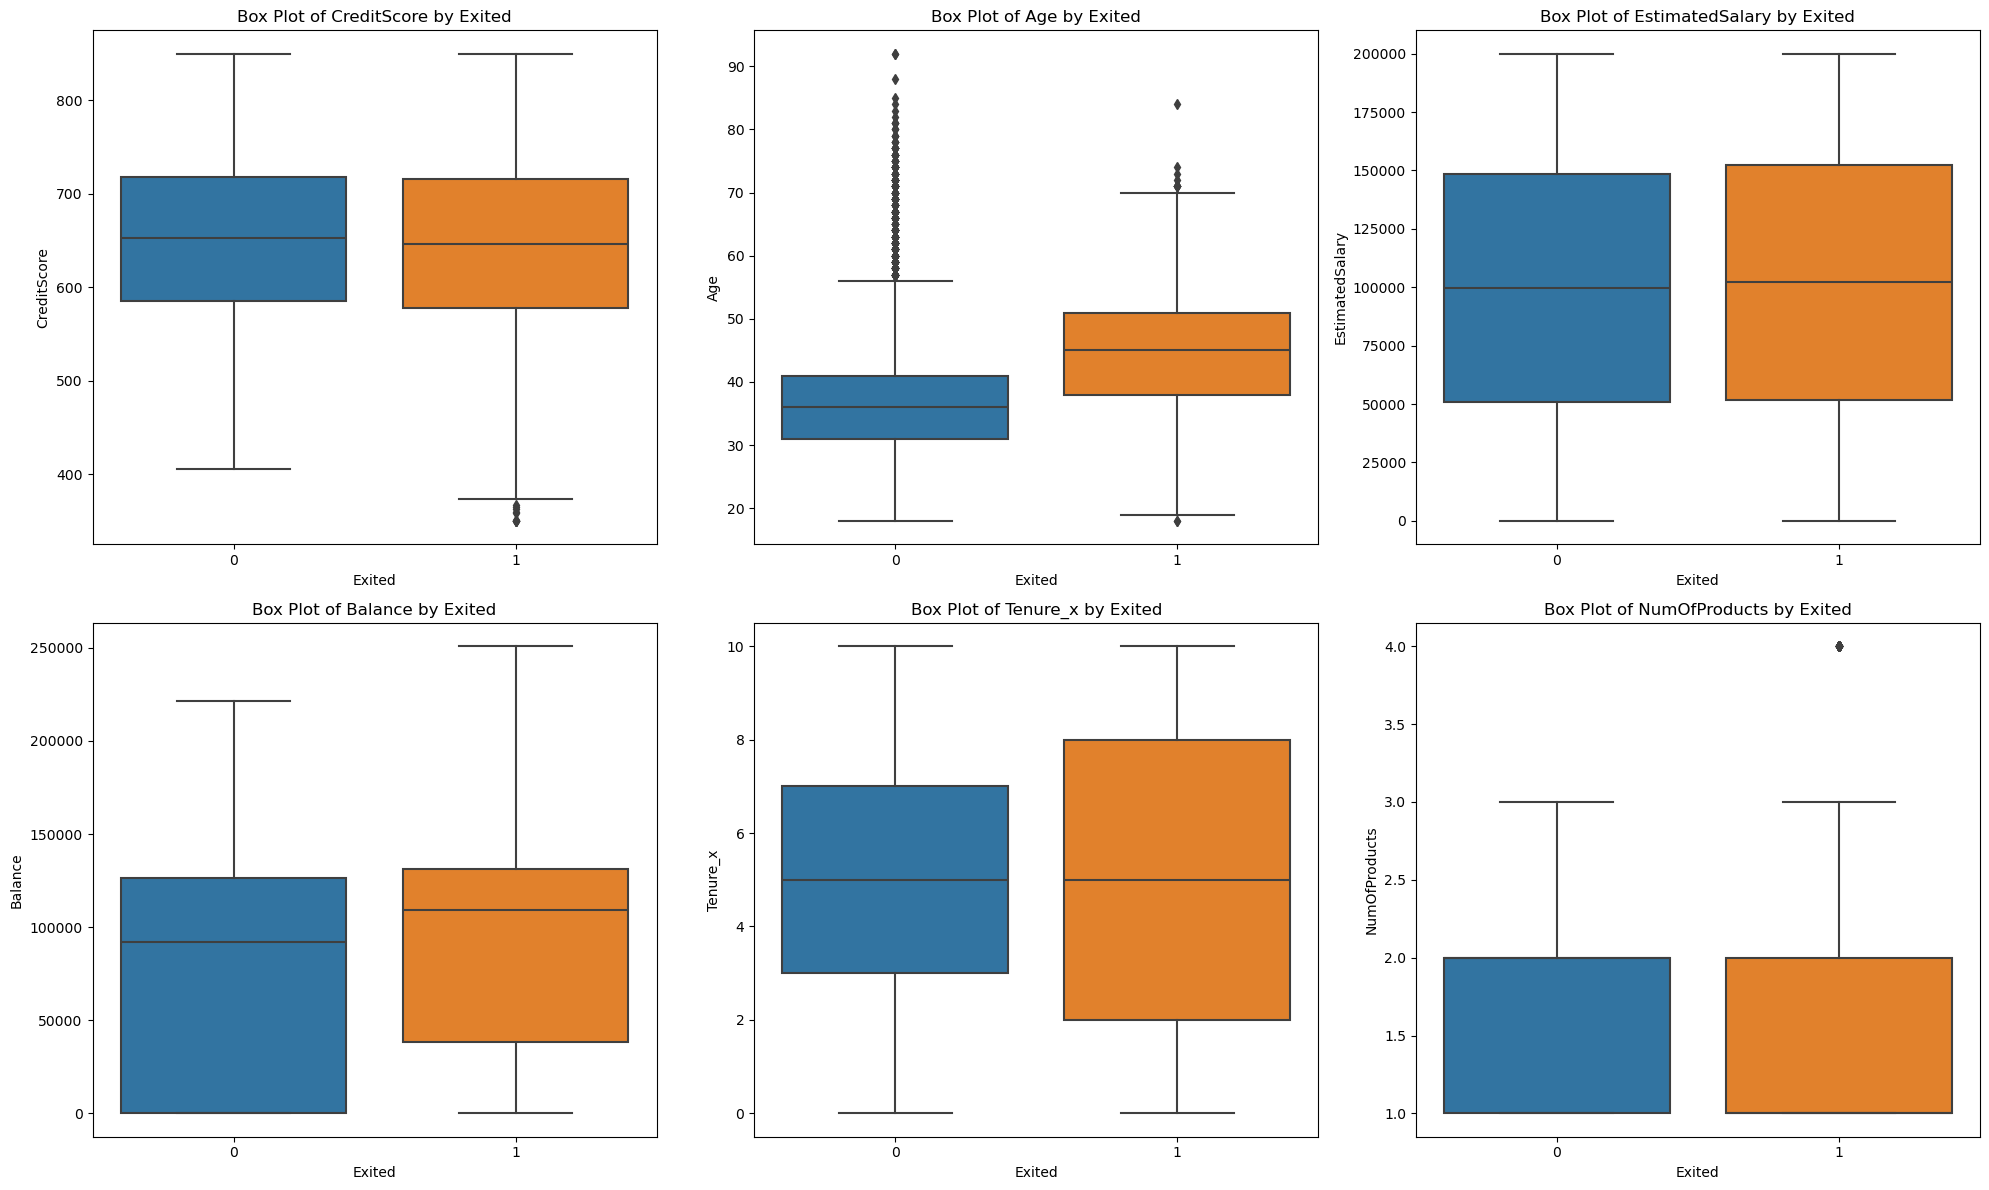

In [51]:
numerical_columns = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance', 'Tenure_x', 'NumOfProducts']
target_variable = 'Exited'
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=Merged_copy, x=target_variable, y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} by {target_variable}')
plt.tight_layout()
plt.show()

## Feature Engineering and Preprocessing strategy

In [52]:
# Feature engineering:-
# -- giving and indicator column to show whether balance is 0 or not.
# Imputation Strategy -
# -Impute using simple Imputer with median for age,estimate,balance,credit_score.
# -Impute tenure by mean
# - for any other columns in the data make the input compulsory.    

# Encoding Strategy - 
# -- Gender, hascrcard, Isactive use onehot encoding ,( you can drop column to reduce multicollinearity)
# -- Label encoding for Geography

# Outlier strategy:
# -- compare between log transformation and IQR capping and check the results
# Scaling:
# -- simply do standard scaling 
# Base Model:-
# -- try classifier models like Logistic regression,svm,random forest,xgboost all with the weight parameter as balanced
                 
                 

In [53]:
Merged_copy.head()

CreditScore Geography  Gender   Age  Tenure_x  EstimatedSalary    Balance  \
0          619       FRA  Female  42.0         2        101348.88       0.00   
2          608     Spain  Female  41.0         1        112542.58   83807.86   
3          502    French  Female  42.0         8        113931.57  159660.80   
4          699       FRA  Female  39.0         1         93826.63       0.00   
5          850     Spain  Female  43.0         2         79084.10  125510.82   

   NumOfProducts HasCrCard IsActiveMember  Exited  
0              1       Yes            Yes       1  
2              1       Yes            Yes       0  
3              3        No             No       1  
4              2        No             No       0  
5              1       Yes            Yes       0

## Feature Construction

In [54]:
Merged_copy["Zero_Balnce"] = Merged_copy["Balance"].apply(lambda x : 1 if x==0 else 0)

In [55]:
Merged_copy.head()

CreditScore Geography  Gender   Age  Tenure_x  EstimatedSalary    Balance  \
0          619       FRA  Female  42.0         2        101348.88       0.00   
2          608     Spain  Female  41.0         1        112542.58   83807.86   
3          502    French  Female  42.0         8        113931.57  159660.80   
4          699       FRA  Female  39.0         1         93826.63       0.00   
5          850     Spain  Female  43.0         2         79084.10  125510.82   

   NumOfProducts HasCrCard IsActiveMember  Exited  Zero_Balnce  
0              1       Yes            Yes       1            1  
2              1       Yes            Yes       0            0  
3              3        No             No       1            0  
4              2        No             No       0            1  
5              1       Yes            Yes       0            0

## Making preprocessing pipeline when outlier treatment is capping

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

class IQRCapper(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor
    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.lower_bounds_ = X.quantile(0.25) - self.factor * (X.quantile(0.75) - X.quantile(0.25))
        self.upper_bounds_ = X.quantile(0.75) + self.factor * (X.quantile(0.75) - X.quantile(0.25))
        return self
    def transform(self, X):
        X = pd.DataFrame(X)
        for col in X.columns:
            X[col] = np.clip(X[col], self.lower_bounds_[col], self.upper_bounds_[col])
        return X.values

numeric_cols = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance']
tenure_col = ['Tenure_x']
cat_ohe_cols = ['Gender', 'HasCrCard', 'IsActiveMember']
cat_ord_cols = ['Geography']

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('iqr', IQRCapper()),
    ('scaler', StandardScaler())
])

tenure_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

ohe_pipeline = Pipeline([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

ordinal_pipeline = Pipeline([
    ('ord', OrdinalEncoder())
])

preprocessing_2 = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_cols),
    ('tenure', tenure_pipeline, tenure_col),
    ('ohe', ohe_pipeline, cat_ohe_cols),
    ('ord', ordinal_pipeline, cat_ord_cols)
], remainder='passthrough')


## Making preprocessing pipeline using log transformation

In [89]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X): return np.log1p(X)

numeric_cols = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance']
tenure_col = ['Tenure_x']
cat_ohe_cols = ['Gender', 'HasCrCard', 'IsActiveMember']
cat_ord_cols = ['Geography']

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('log', LogTransformer()),
    ('scaler', StandardScaler())
])

tenure_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

ohe_pipeline = Pipeline([('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))])
ordinal_pipeline = Pipeline([('ord', OrdinalEncoder())])

preprocessing_1 = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_cols),
    ('tenure', tenure_pipeline, tenure_col),
    ('ohe', ohe_pipeline, cat_ohe_cols),
    ('ord', ordinal_pipeline, cat_ord_cols)
], remainder='passthrough')

## Splitting the data

In [90]:
from sklearn.model_selection import train_test_split

X = Merged_copy.drop("Exited", axis=1)  
y = Merged_copy["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=57)

## Importing the Baseline Regressor Models and predicting

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


def evaluate_baseline_models_with_train(X_train, X_test, y_train, y_test, preprocessing_pipeline):
    models = {
        "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
        "SVM": SVC(class_weight='balanced', probability=True, random_state=42),
        "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
        "XGBoost": XGBClassifier(scale_pos_weight=4, eval_metric='logloss', random_state=42)
    }
    results = []
    for name, model in models.items():
        pipeline = Pipeline([("preprocessing", preprocessing_pipeline), ("classifier", model)])
        pipeline.fit(X_train, y_train)
        y_train_pred, y_test_pred = pipeline.predict(X_train), pipeline.predict(X_test)
        y_train_proba = pipeline.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
        y_test_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        results.append({
            "Model": name,
            "Train Accuracy": accuracy_score(y_train, y_train_pred),
            "Test Accuracy": accuracy_score(y_test, y_test_pred),
            "Train Precision": precision_score(y_train, y_train_pred),
            "Test Precision": precision_score(y_test, y_test_pred),
            "Train Recall": recall_score(y_train, y_train_pred),
            "Test Recall": recall_score(y_test, y_test_pred),
            "Train F1": f1_score(y_train, y_train_pred),
            "Test F1": f1_score(y_test, y_test_pred),
            "Train ROC-AUC": roc_auc_score(y_train, y_train_proba) if y_train_proba is not None else "N/A",
            "Test ROC-AUC": roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else "N/A"
        })
    return pd.DataFrame(results).sort_values(by="Test F1", ascending=False).reset_index(drop=True)


## Result of log transformation

In [60]:
baseline_results = evaluate_baseline_models_with_train(X_train, X_test, y_train, y_test, preprocessing_1)
print(baseline_results)

                 Model  Train Accuracy  Test Accuracy  Train Precision  \
0              XGBoost         0.95675         0.8240         0.832642   
1                  SVM         0.79650         0.7895         0.500407   
2        Random Forest         1.00000         0.8530         1.000000   
3  Logistic Regression         0.70075         0.6975         0.375651   

   Test Precision  Train Recall  Test Recall  Train F1   Test F1  \
0        0.560440      0.985890     0.626536  0.902809  0.591647   
1        0.488487      0.753988     0.729730  0.601566  0.585222   
2        0.755656      1.000000     0.410319  1.000000  0.531847   
3        0.367292      0.707975     0.673219  0.490855  0.475282   

   Train ROC-AUC  Test ROC-AUC  
0       0.993809      0.840520  
1       0.866661      0.843853  
2       1.000000      0.844792  
3       0.767649      0.755162  


## Result of capping

In [61]:
baseline_results = evaluate_baseline_models_with_train(X_train, X_test, y_train, y_test, preprocessing_2)
print(baseline_results)

                 Model  Train Accuracy  Test Accuracy  Train Precision  \
0              XGBoost        0.961625         0.8225         0.848341   
1                  SVM        0.796875         0.7890         0.501018   
2        Random Forest        1.000000         0.8540         1.000000   
3  Logistic Regression        0.707250         0.7040         0.380697   

   Test Precision  Train Recall  Test Recall  Train F1   Test F1  \
0        0.558296      0.988344     0.611794  0.913007  0.583822   
1        0.487479      0.754601     0.717445  0.602203  0.580517   
2        0.772512      1.000000     0.400491  1.000000  0.527508   
3        0.370990      0.696933     0.653563  0.492414  0.473310   

   Train ROC-AUC  Test ROC-AUC  
0       0.995484      0.841823  
1       0.869446      0.843668  
2       1.000000      0.843424  
3       0.770545      0.758003  


In [62]:
# # observation
# -- for both treatments results are quite similar with log tranformation giving slight better results terms of recall 
# -- SVM is the most generalized model with highest recall
# -- for xgboost hypertuning and regularisation can be done to reduce overfitting

## Tuning SVM classifier using preprocessing pipeline_1 and comparing train-test scores

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    make_scorer, accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, classification_report
)

svm = SVC(class_weight='balanced', probability=True)

svm_pipeline = Pipeline([
    ('preprocessing', preprocessing_1),
    ('svm', svm)
])

param_grid = {
    'svm__kernel': ['rbf', 'linear'],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto']
}

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("🔧 Best Parameters:", grid_search.best_params_)

y_train_pred = grid_search.predict(X_train)
y_train_proba = grid_search.predict_proba(X_train)[:, 1]
y_test_pred = grid_search.predict(X_test)
y_test_proba = grid_search.predict_proba(X_test)[:, 1]

print("\n📘 Train Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Train ROC AUC:", roc_auc_score(y_train, y_train_proba))

print("\n📗 Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_test_proba))

print("\n🔍 Comparison Summary:")
print(f"{'Metric':<15}{'Train':<10}{'Test'}")
print(f"{'Accuracy':<15}{accuracy_score(y_train, y_train_pred):<10.4f}{accuracy_score(y_test, y_test_pred):.4f}")
print(f"{'Precision':<15}{precision_score(y_train, y_train_pred):<10.4f}{precision_score(y_test, y_test_pred):.4f}")
print(f"{'Recall':<15}{recall_score(y_train, y_train_pred):<10.4f}{recall_score(y_test, y_test_pred):.4f}")
print(f"{'F1 Score':<15}{f1_score(y_train, y_train_pred):<10.4f}{f1_score(y_test, y_test_pred):.4f}")
print(f"{'ROC AUC':<15}{roc_auc_score(y_train, y_train_proba):<10.4f}{roc_auc_score(y_test, y_test_proba):.4f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
🔧 Best Parameters: {'svm__C': 10, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}

📘 Train Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      6370
           1       0.51      0.82      0.62      1630

    accuracy                           0.80      8000
   macro avg       0.73      0.81      0.74      8000
weighted avg       0.86      0.80      0.81      8000

Train ROC AUC: 0.8916235035779295

📗 Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1593
           1       0.47      0.78      0.59       407

    accuracy                           0.78      2000
   macro avg       0.70      0.78      0.72      2000
weighted avg       0.84      0.78      0.79      2000

Test ROC AUC: 0.8512981394337327

🔍 Comparison Summary:
Metric         Train     Test
Accuracy       0.7996   

## Tuning XGB Classifier using preprocessing pipeline_1

In [67]:

param_grid_1 = {
    'n_estimators': [100,125,150,175],
    'max_depth': [3,5,7],
    'min_child_weight': [30,35,40,45],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.8],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [1, 5, 10]
}

xgb_model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=4,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

pipeline = Pipeline([
    ('preprocessing',preprocessing_1),
    ('classifier', xgb_model)
])

grid_search_1 = GridSearchCV(
    estimator=pipeline,
    param_grid={f'classifier__{k}': v for k, v in param_grid_1.items()},
    scoring='recall',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_1.fit(X_train, y_train)

print("Best Parameters:", grid_search_1.best_params_)
print("Best Recall:", grid_search_1.best_score_)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[14:51:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Best Parameters: {'classifier__colsample_bytree': 1.0, 'classifier__gamma': 0, 'classifier__max_depth': 3, 'classifier__min_child_weight': 45, 'classifier__n_estimators': 100, 'classifier__reg_lambda': 10, 'classifier__subsample': 0.8}
Best Recall: 0.7521472392638037


## Predicting with XGB classifier with best parameters and threshold and comparing train-test scores

In [129]:

final_xgb = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    min_child_weight=35,
    colsample_bytree=1,
    subsample=0.8,
    gamma=0.1,
    reg_lambda=10,
    scale_pos_weight=4,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_pipeline = Pipeline([
    ('preprocessing', preprocessing_1),
    ('classifier', final_xgb)
])

xgb_pipeline.fit(X_train, y_train)

y_train_proba = xgb_pipeline.predict_proba(X_train)[:, 1]
y_test_proba = xgb_pipeline.predict_proba(X_test)[:, 1]

y_train_pred = (y_train_proba >= 0.5).astype(int)
y_test_pred = (y_test_proba >= 0.5).astype(int)

print("\n Train Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Train ROC AUC:", roc_auc_score(y_train, y_train_proba))

print("\n Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_test_proba))

print("\n Comparison Summary:")
print(f"{'Metric':<15}{'Train':<10}{'Test'}")
print(f"{'Accuracy':<15}{accuracy_score(y_train, y_train_pred):<10.4f}{accuracy_score(y_test, y_test_pred):.4f}")
print(f"{'Precision':<15}{precision_score(y_train, y_train_pred):<10.4f}{precision_score(y_test, y_test_pred):.4f}")
print(f"{'Recall':<15}{recall_score(y_train, y_train_pred):<10.4f}{recall_score(y_test, y_test_pred):.4f}")
print(f"{'F1 Score':<15}{f1_score(y_train, y_train_pred):<10.4f}{f1_score(y_test, y_test_pred):.4f}")
print(f"{'ROC AUC':<15}{roc_auc_score(y_train, y_train_proba):<10.4f}{roc_auc_score(y_test, y_test_proba):.4f}")



C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:40:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





 Train Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      6370
           1       0.53      0.81      0.64      1630

    accuracy                           0.82      8000
   macro avg       0.74      0.81      0.76      8000
weighted avg       0.86      0.82      0.83      8000

Train ROC AUC: 0.9010416445955447

 Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1593
           1       0.50      0.79      0.61       407

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.85      0.80      0.81      2000

Test ROC AUC: 0.8643527965561865

 Comparison Summary:
Metric         Train     Test
Accuracy       0.8170    0.7965
Precision      0.5337    0.5000
Recall         0.8061    0.7887
F1 Score       0.6422    0.6120
ROC AUC        0.9010    0.8644


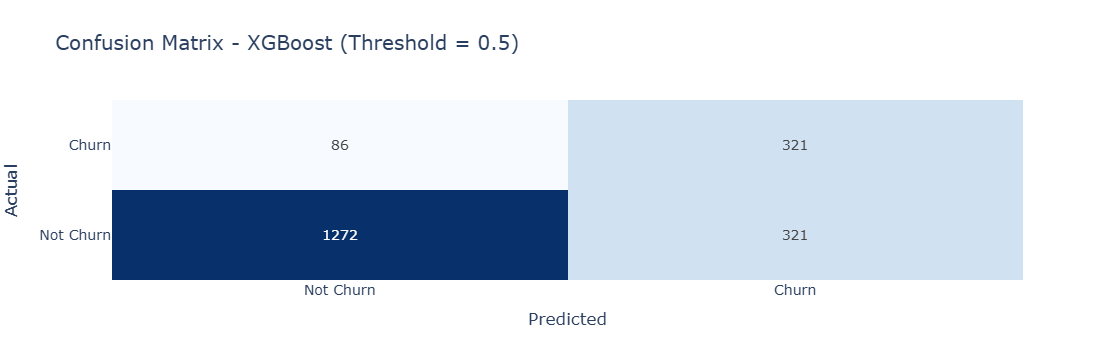

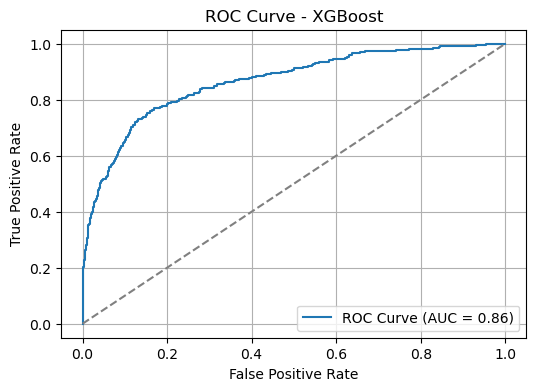

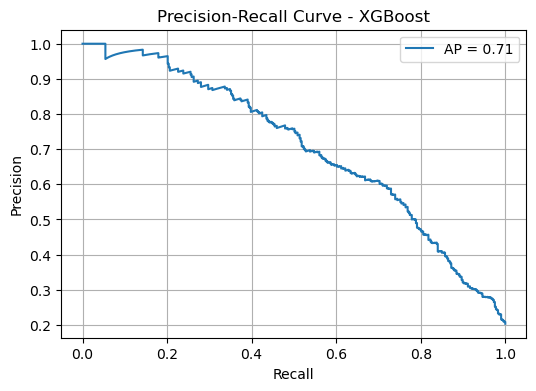

Classification Report (Threshold = 0.5):

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1593
           1       0.50      0.79      0.61       407

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.85      0.80      0.81      2000



In [130]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve,
    average_precision_score
)
import plotly.graph_objects as go

y_test_pred = xgb_pipeline.predict(X_test)
y_test_proba = xgb_pipeline.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_test_pred)
labels = ['Not Churn', 'Churn']

fig = go.Figure(data=go.Heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    hoverongaps=False,
    colorscale='Blues',
    text=conf_matrix,
    texttemplate="%{text}",
    showscale=False
))

fig.update_layout(
    title='Confusion Matrix - XGBoost (Threshold = 0.5)',
    xaxis=dict(title='Predicted', tickmode='array', tickvals=[0, 1], ticktext=labels),
    yaxis=dict(title='Actual', tickmode='array', tickvals=[0, 1], ticktext=labels),
    font=dict(size=14)
)

fig.show()

fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
ap_score = average_precision_score(y_test, y_test_proba)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'AP = {ap_score:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.legend()
plt.grid(True)
plt.show()

print("Classification Report (Threshold = 0.5):\n")
print(classification_report(y_test, y_test_pred))


In [ ]:
'''observation : -
FOR BASE MODEL
- It was found that SVM performed the best in terms of recall although the precision was low
- there was overfitting in xgboost but with scope of improvement

tuned models-
- svm performance was almost the same after tuning
- xgboost showed significant improvement after tuning and regularization with reduced overfitting and test recall of 76%.'''



In [131]:
import joblib


joblib.dump(xgb_pipeline, 'final_churn_pipeline.pkl')
print("Pipeline saved as final_churn_pipeline.pkl")

Pipeline saved as final_churn_pipeline.pkl


In [132]:
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_test, "y_test.pkl")

['y_test.pkl']